# Spectral Construction

In [3]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## 

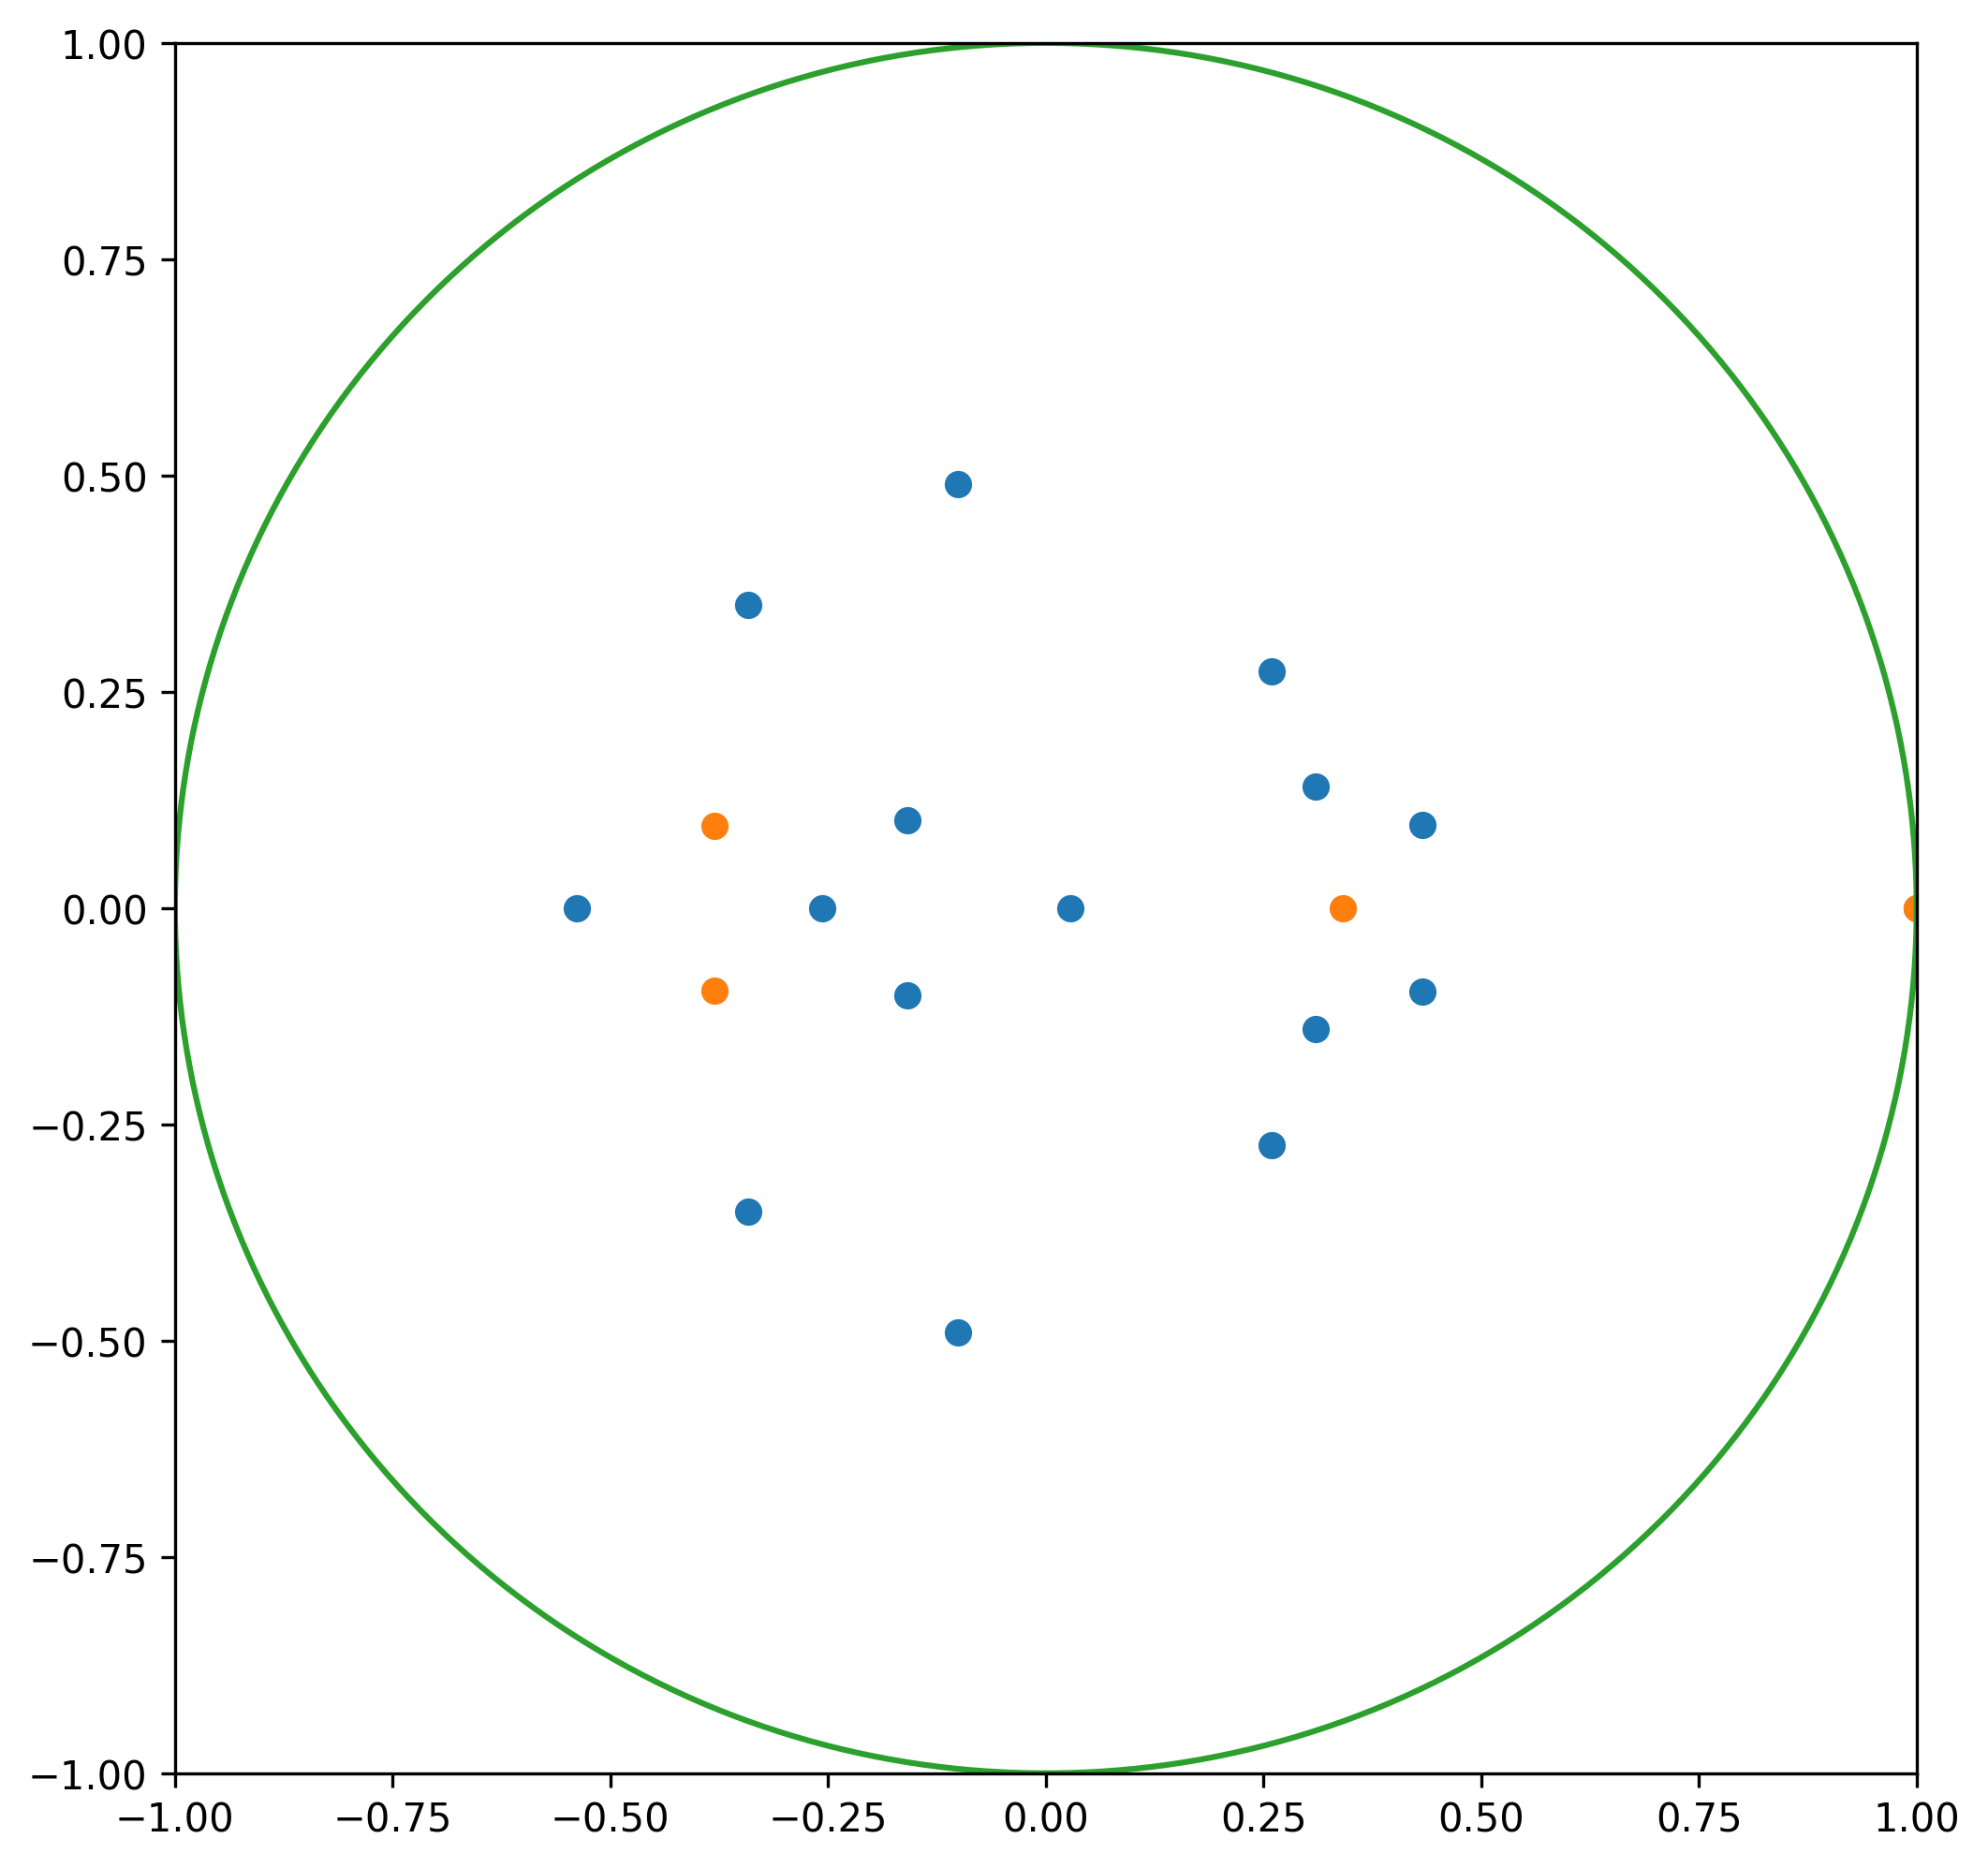

In [142]:
n = 2
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
                      
kraus_target = KrausMap(d = d, 
                        rank = d,
                      )

kraus_model = KrausMap(d = d, 
                        rank = d,
                      )


spectrum_target = channel_spectrum(kraus_target)
t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "o")
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [143]:
model = ModelQuantumMap(
                        channel = kraus_model,
                        loss_function = SpectrumDistance(sigma=1, k = 100),
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

  0%|          | 0/100 [00:00<?, ?it/s]

6.737219825025953e-06 None


In [149]:
model.train(inputs = [spectrum_target],
            targets = [],
            num_iter = 100,
            N = 0,
           )

  0%|          | 0/100 [00:00<?, ?it/s]

5.870768464766307e-05 None


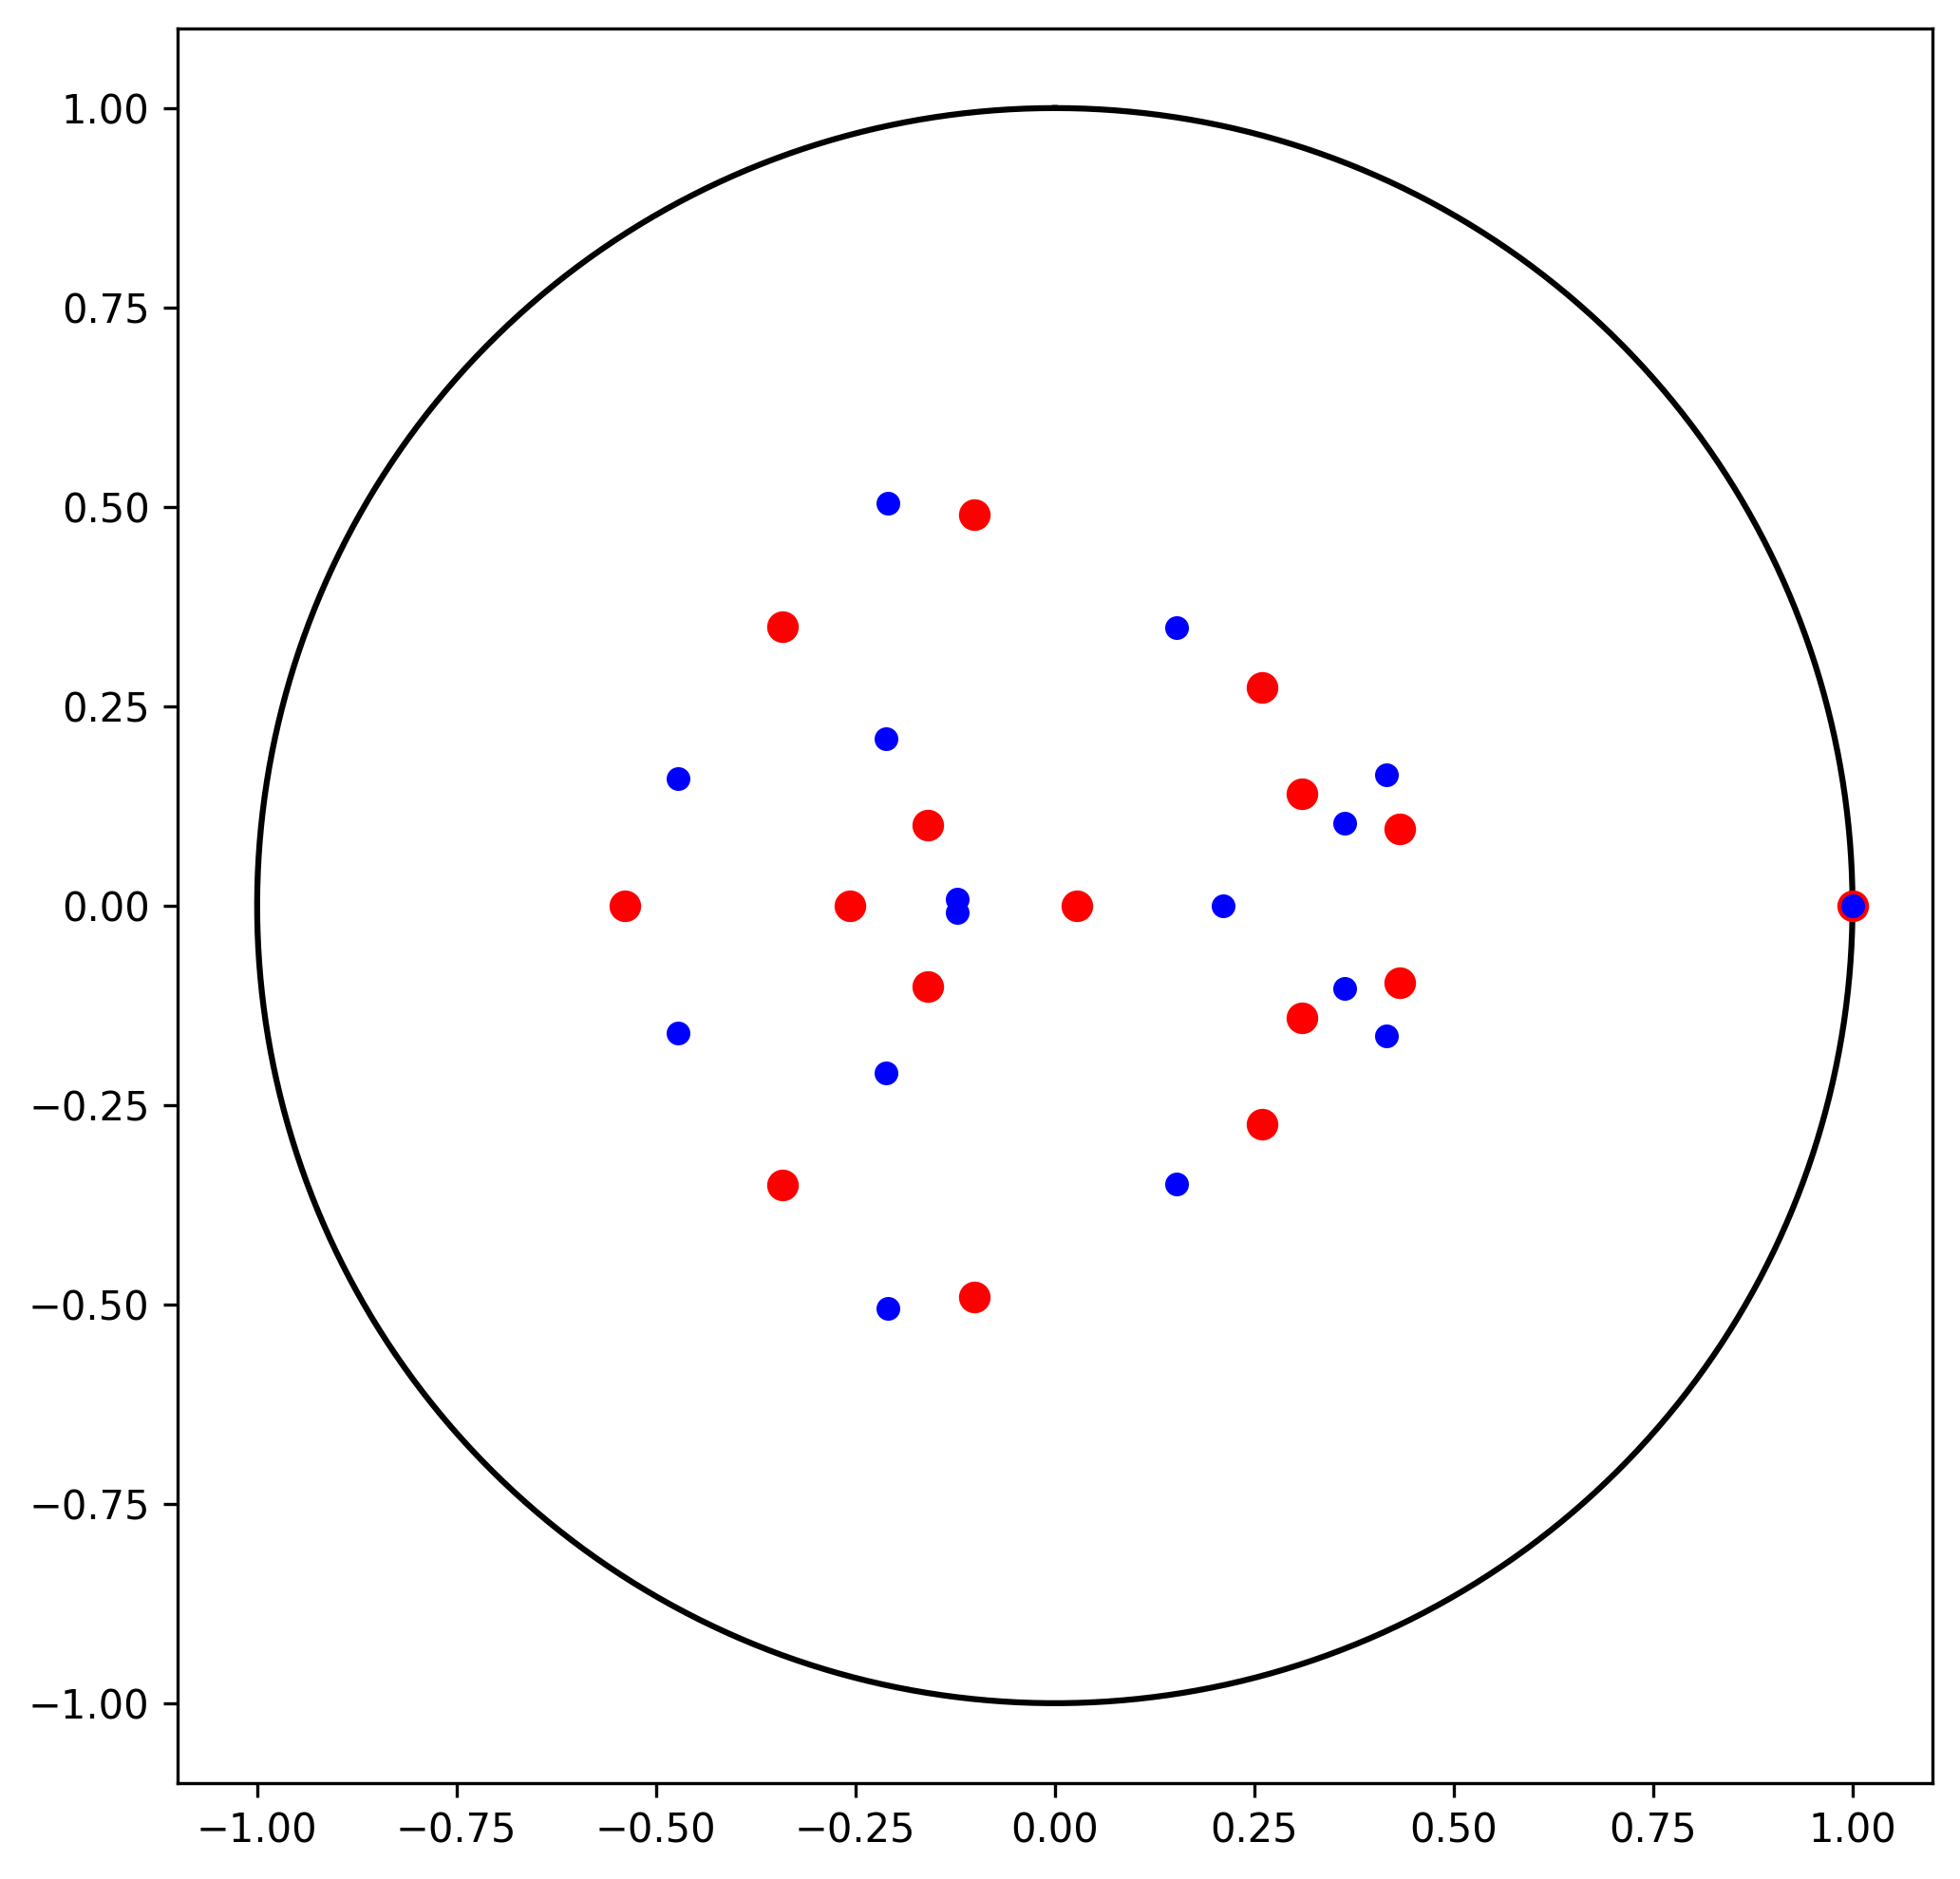

In [150]:
spectrum_model = channel_spectrum(kraus_model)
    
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k-")
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "ro", markersize = 7)
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo", markersize = 5)

In [138]:
t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0.0008029166863005033 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.0007365152619543958 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.0006699351618566496 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.0006038223672741871 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.0005397143820919936 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.00047795795136218455 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.0004187379527452739 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.00036266780713234414 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.0003098887921522131 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.0002607374057836953 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.00021599163836727442 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.00017577831300885638 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.00014001791206363912 None


  0%|          | 0/2 [00:00<?, ?it/s]

0.00010892198571876843 None


  0%|          | 0/2 [00:00<?, ?it/s]

8.240131057413169e-05 None


  0%|          | 0/2 [00:00<?, ?it/s]

6.030973794990402e-05 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.247890293906931e-05 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.843372428951163e-05 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.780199440581942e-05 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.019785650602234e-05 None


  0%|          | 0/2 [00:00<?, ?it/s]

5.097414765509178e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.027770836132703e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.714130602545552e-07 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.817687860812157e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.5026414129936114e-07 None


  0%|          | 0/2 [00:00<?, ?it/s]

8.560015303249457e-07 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.5776504438402839e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.228171133378254e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.7090130568785398e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.9575702331641196e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.966164744933053e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.773993302951361e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.4307742171325586e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.9988481960719895e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.5345997086413377e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.0952490536730863e-06 None


  0%|          | 0/2 [00:00<?, ?it/s]

7.139542271827892e-07 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.133777056214427e-07 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.0046274618046311e-07 None


  0%|          | 0/2 [00:00<?, ?it/s]

7.177152472337411e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.113534486840706e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.4257076630386223e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.2453448100812068e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

5.635597000175352e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

8.889820724000685e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.1189863979854664e-07 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.204674543453521e-07 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.1515456144195468e-07 None


  0%|          | 0/2 [00:00<?, ?it/s]

9.897281205706321e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

7.646797672844485e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

5.2490731095033993e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

3.115553781629643e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.4908825174408946e-08 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.82346029784253e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.933601305268098e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

3.9568393006561564e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.8018842801458277e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

5.8485204457170425e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

8.22728551952423e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

9.2439264021138e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

8.746186885844054e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

7.133523327595981e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.966528743821641e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.8487030512280853e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.2279445238405629e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.854613212477375e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.784994457272205e-12 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.7243151351209463e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

5.378407719192069e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

8.693219477606817e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.0237650727162872e-09 None


  0%|          | 0/2 [00:00<?, ?it/s]

9.680549695190166e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

7.521288036826945e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.728687441613033e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.2125623555524498e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

5.994027496569743e-11 None


Exception ignored in: <function tqdm.__del__ at 0x000001F490919A20>
Traceback (most recent call last):
  File "C:\Users\krisw\AppData\Roaming\Python\Python310\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "C:\Users\krisw\AppData\Roaming\Python\Python310\site-packages\tqdm\notebook.py", line 288, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


  0%|          | 0/2 [00:00<?, ?it/s]

1.238009694759512e-12 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.1755819368252105e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

7.760736497886e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.2750289712926133e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.458609899529506e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.290191287139919e-10 None


  0%|          | 0/2 [00:00<?, ?it/s]

8.940626017306386e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.588962543294883e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.4043988194600843e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

6.52145004664817e-13 None


  0%|          | 0/2 [00:00<?, ?it/s]

3.0723201760451957e-12 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.3080647676133594e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.1961543694715147e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.4561908062992188e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

2.0388246646518837e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.2538303728604205e-11 None


  0%|          | 0/2 [00:00<?, ?it/s]

5.041411732520373e-12 None


  0%|          | 0/2 [00:00<?, ?it/s]

7.539524560229438e-13 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.596500709410975e-13 None


  0%|          | 0/2 [00:00<?, ?it/s]

1.9131363160340698e-12 None


  0%|          | 0/2 [00:00<?, ?it/s]

3.93662880071588e-12 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.762967797944384e-12 None


  0%|          | 0/2 [00:00<?, ?it/s]

4.0430991887774326e-12 None


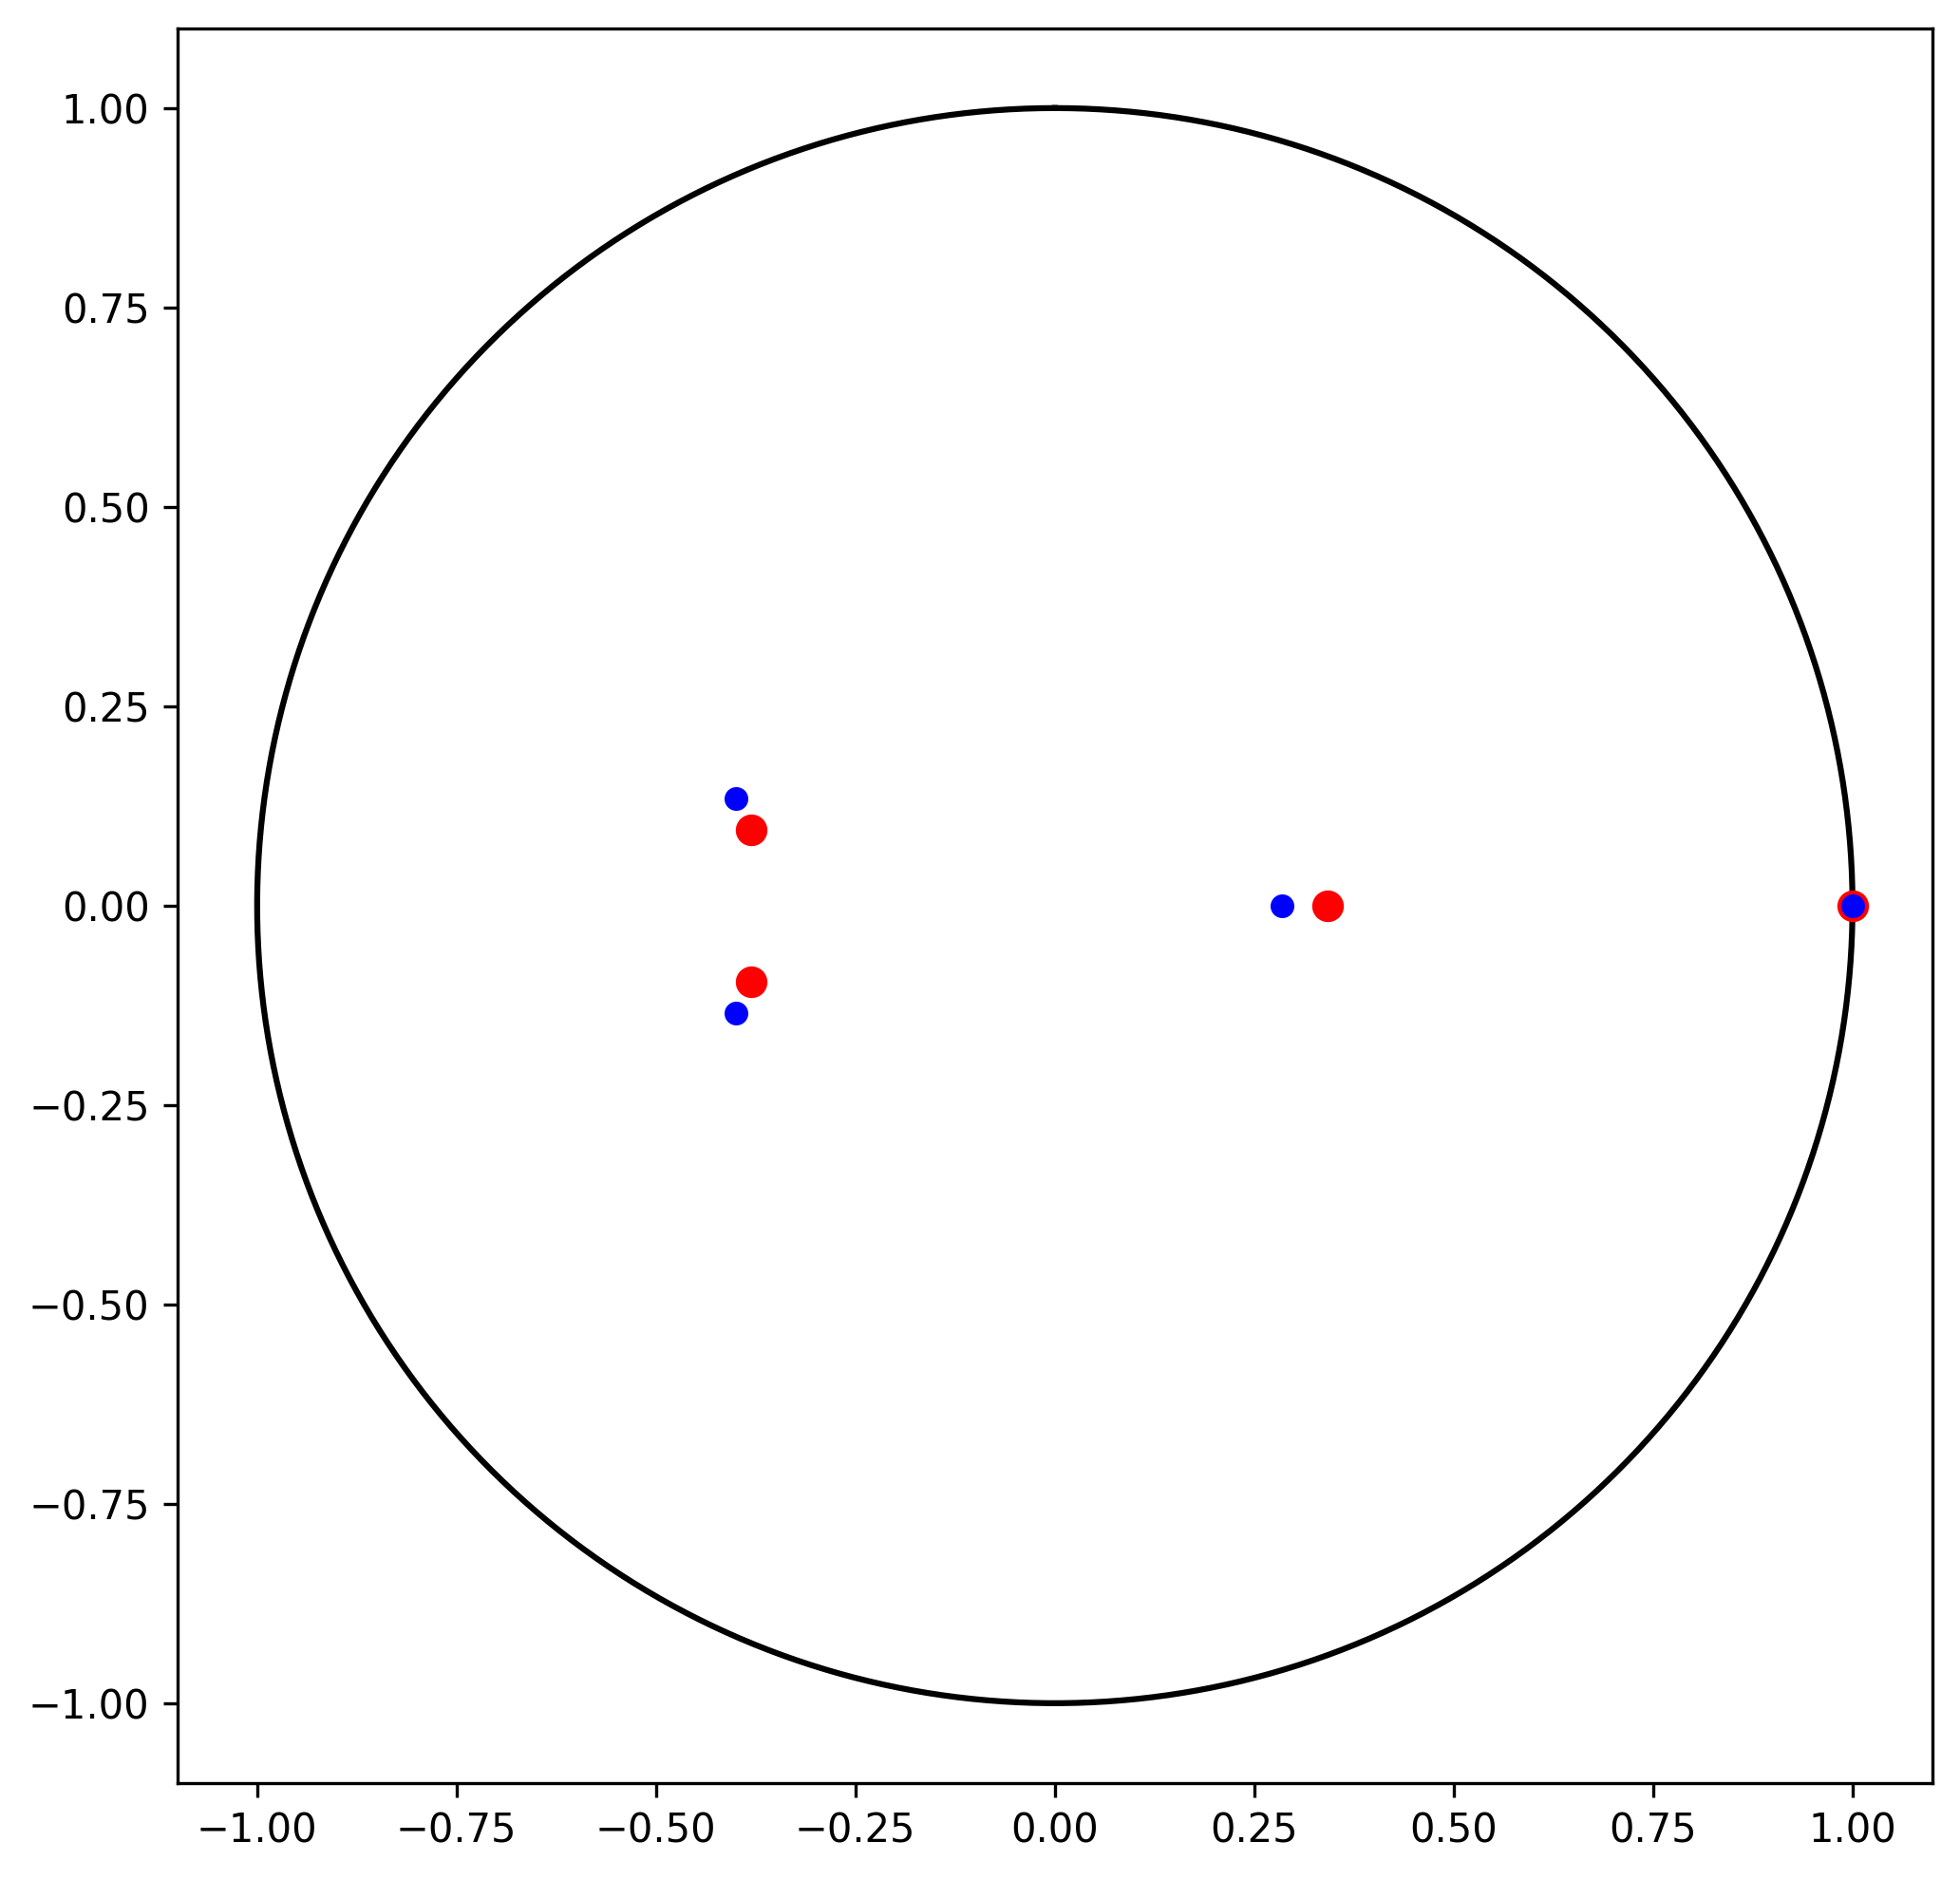

In [139]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k-")

plt.plot(spectrum_target[:,0], spectrum_target[:,1], "ro", markersize = 7)
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo", markersize = 5)
fig.savefig(f"spectrum_retry_fig0.png")

for i in tqdm(range(1, 100)):
    model.train(inputs = [spectrum_target],
                targets = [],
                num_iter = 2,
                N = 0)

    spectrum_model = channel_spectrum(kraus_model)
    
    fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    plt.plot(*circle, "k-")
    plt.plot(spectrum_target[:,0], spectrum_target[:,1], "ro", markersize = 7)
    plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo", markersize = 5)
    fig.savefig(f"spectrum_retry_fig{i}.png")
    plt.close(fig)

In [141]:
from src import *
from PIL import Image
import glob

frames = []
imgs = glob.glob("*.png")
imgs = sorted(imgs, key=lambda name: int(name[18:-4]))

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
    
frames[0].save('png_to_gif_retry.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1, loop=0)